<a href="https://colab.research.google.com/github/yazidsupriadi/belajar-python/blob/master/UTS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [41]:
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
import pandas as pd 
import pydotplus 
from IPython.display import Image 

In [47]:
col_names = ['warna', 'bulu', 'makanan', 'jenis']
data = pd.read_excel("./data.xlsx", header = None, names = col_names)
data

,warna,bulu,makanan,jenis
0,Hitam,Panjang,Wortel,A
1,Putih,Panjang,Wortel,A
2,Cokelat,Pendek,Kangkung,B
3,Hitam,Pendek,Kangkung,B
4,Hitam,Gimbal,Rumput,C
5,Cokelat,Gimbal,Rumput,A
6,Cokelat,Panjang,Rumput,B
7,Putih,Pendek,Wortel,B
8,Putih,Pendek,Kangkung,C
9,Cokelat,Gimbal,Kangkung,C


In [37]:
satu_jenis = pd.get_dummies(data[['warna', 'bulu', 'makanan']])
satu_jenis

,warna_Cokelat,warna_Hitam,warna_Putih,bulu_Gimbal,bulu_Panjang,bulu_Pendek,makanan_Kangkung,makanan_Rumput,makanan_Wortel
0,0,1,0,0,1,0,0,0,1
1,0,0,1,0,1,0,0,0,1
2,1,0,0,0,0,1,1,0,0
3,0,1,0,0,0,1,1,0,0
4,0,1,0,1,0,0,0,1,0
5,1,0,0,1,0,0,0,1,0
6,1,0,0,0,1,0,0,1,0
7,0,0,1,0,0,1,0,0,1
8,0,0,1,0,0,1,1,0,0
9,1,0,0,1,0,0,1,0,0


In [45]:
x = satu_jenis

In [46]:
clf = DecisionTreeClassifier()

clf_train = clf.fit(x,data['jenis'])


In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
result = confusion_matrix(pima['jenis'],satu_jenis)
print("Confusion Matrix:")
print(result)
result1 = classification_report(pima['jenis'],satu_jenis)
print("Classification Report:",)
print (result1)
result2 = accuracy_score(pima['jenis'],satu_jenis)
print("Accuracy:",result2)

ValueError: ignored

In [ ]:
from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO
from IPython.display import Image
import pydotplus

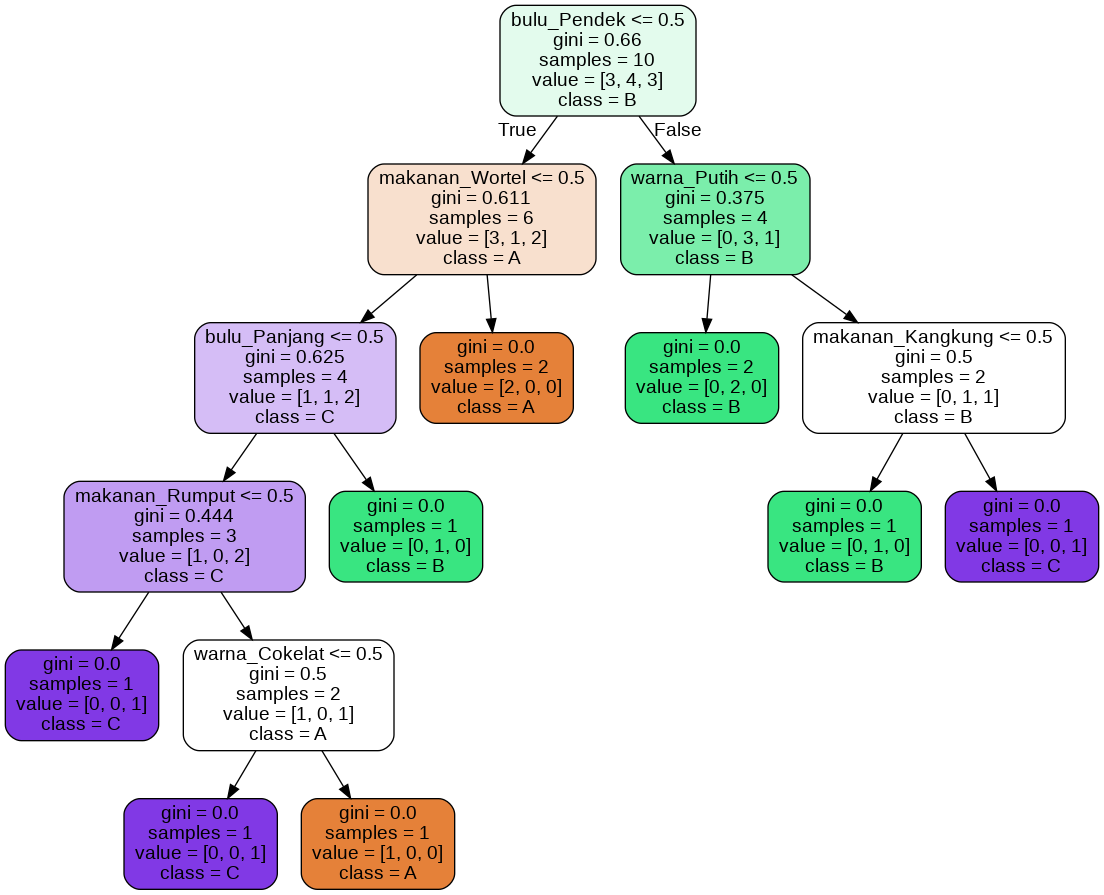

In [ ]:

dot_data = export_graphviz(clf_train, out_file=None, feature_names=list(satu_jenis.columns.values), 
                                class_names=['A', 'B','C'], rounded=True, filled=True) #Gini decides which attribute/feature should be placed at the root node, which features will act as internal nodes or leaf nodes
graph = pydotplus.graph_from_dot_data(dot_data)

Image(graph.create_png())

In [ ]:
#prediction
#hitam gimbal rumput

prediction = clf_train.predict(satu_jenis)
print(prediction)


['A' 'A' 'B' 'B' 'C' 'A' 'B' 'B' 'C' 'C']


In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
result = confusion_matrix(pima['jenis'], prediction)
print("Confusion Matrix:",result)


result1 = classification_report(pima['jenis'],prediction)
print("Classification Report:",)
print (result1)
result2 = accuracy_score(pima['jenis'],prediction)
print("Accuracy:",result2)

Confusion Matrix: [[3 0 0]
 [0 4 0]
 [0 0 3]]
Classification Report:
              precision    recall  f1-score   support

           A       1.00      1.00      1.00         3
           B       1.00      1.00      1.00         4
           C       1.00      1.00      1.00         3

    accuracy                           1.00        10
   macro avg       1.00      1.00      1.00        10
weighted avg       1.00      1.00      1.00        10

Accuracy: 1.0
